# BMI Classification

In [2]:
# pip install imblearn

### Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# From Scipy 
from scipy.stats import loguniform

In [4]:
# From Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, f1_score

In [5]:
# For SMOTE
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("bmi.csv")

In [7]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Data Exploration

In [8]:
# Define a function to map index values to class names
def map_index_to_class(index):
    class_mapping = {
        0: 'Extremely Weak',
        1: 'Weak',
        2: 'Normal',
        3: 'Overweight',
        4: 'Obesity',
        5: 'Extreme Obesity'
    }
    return class_mapping[index]


In [9]:
# Apply the function to the 'Index' column to create the 'Class' column
df['Class'] = df['Index'].apply(map_index_to_class)

In [10]:
df.head()

,Gender,Height,Weight,Index,Class
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
 4   Class   500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


In [12]:
df.nunique().sort_values()

Gender      2
Index       6
Class       6
Height     60
Weight    110
dtype: int64

In [13]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


### Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x20cced8c5e0>,
 [Text(0.7060759556217818, -2.0836162662286903, 'Extreme Obesity'),
  Text(-2.1707090928012236, 0.3578016691270303, 'Obesity'),
  Text(-0.34415600618713793, 2.1729143203093213, 'Normal'),
  Text(1.4235229948406443, 1.6773736265841086, 'Overweight'),
  Text(2.100701966137308, 0.6534915833175287, 'Weak'),
  Text(2.1926650329693853, 0.1794994517912643, 'Extremely Weak')],
 [Text(0.38513233943006275, -1.1365179633974674, '39.6%'),
  Text(-1.18402314152794, 0.19516454679656198, '26.0%'),
  Text(-0.18772145792025702, 1.1852259928959934, '13.8%'),
  Text(0.7764670880948967, 0.9149310690458773, '13.6%'),
  Text(1.145837436074895, 0.3564499545368338, '4.4%'),
  Text(1.1959991088923918, 0.09790879188614415, '2.6%')])

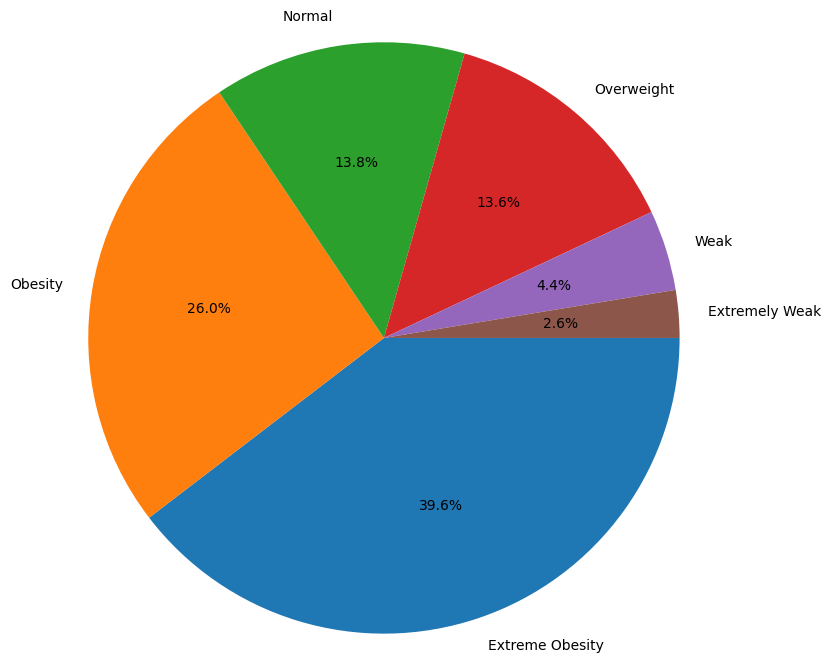

In [14]:
# Let us first analyze the distribution of the target variable
plt.pie(df["Index"].value_counts(), labels=df["Class"].value_counts().index, counterclock=False, autopct='%1.1f%%', radius=2)

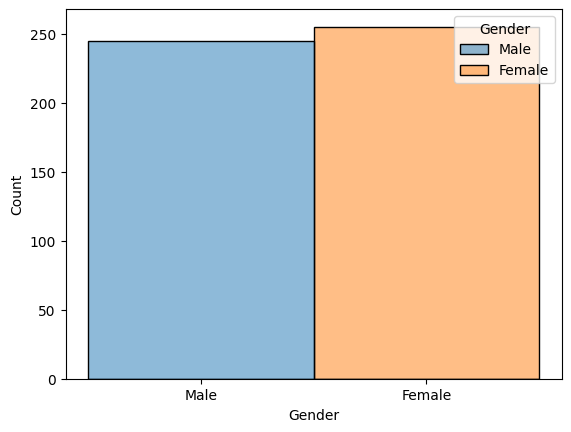

In [15]:
# Visualising the categorical features

sns.histplot(data=df, x = "Gender", hue = "Gender")
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

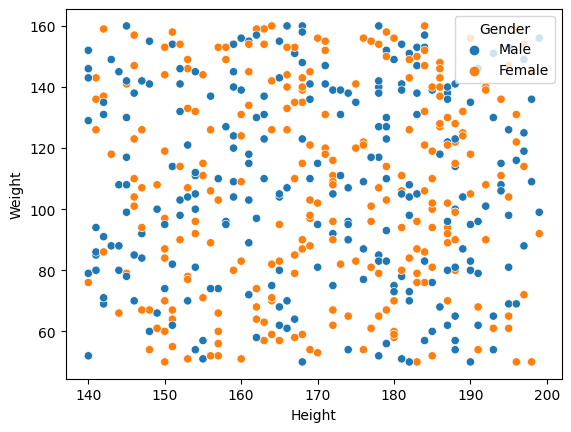

In [16]:
sns.scatterplot(x='Height',y='Weight', hue='Gender', data=df)

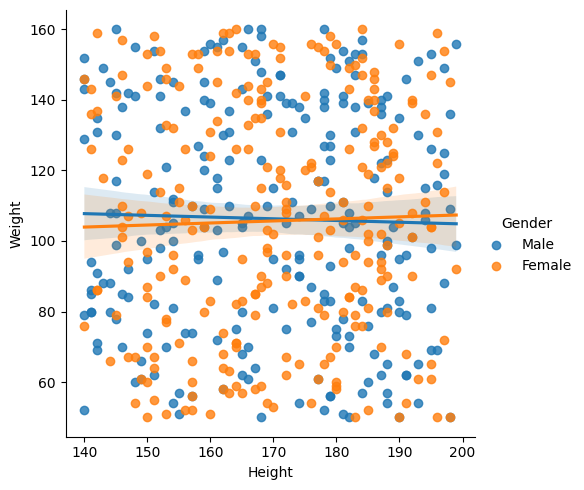

In [17]:
sns.lmplot(x='Height', y='Weight', hue='Gender', data=df)

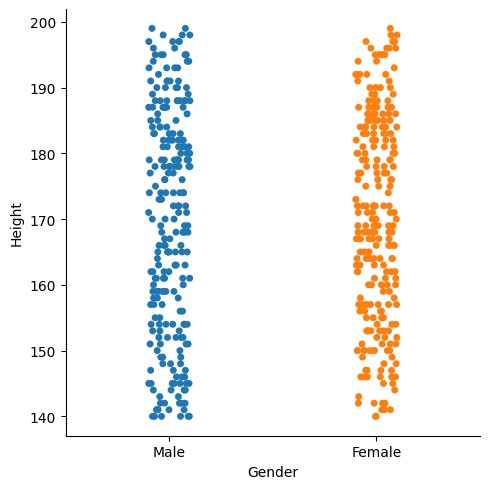

In [18]:
sns.catplot(x='Gender', y='Height', hue = 'Gender', data=df)

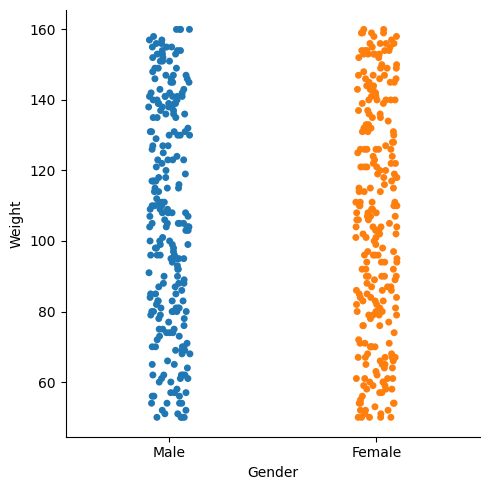

In [19]:
sns.catplot(x='Gender',y='Weight',data=df, hue='Gender')

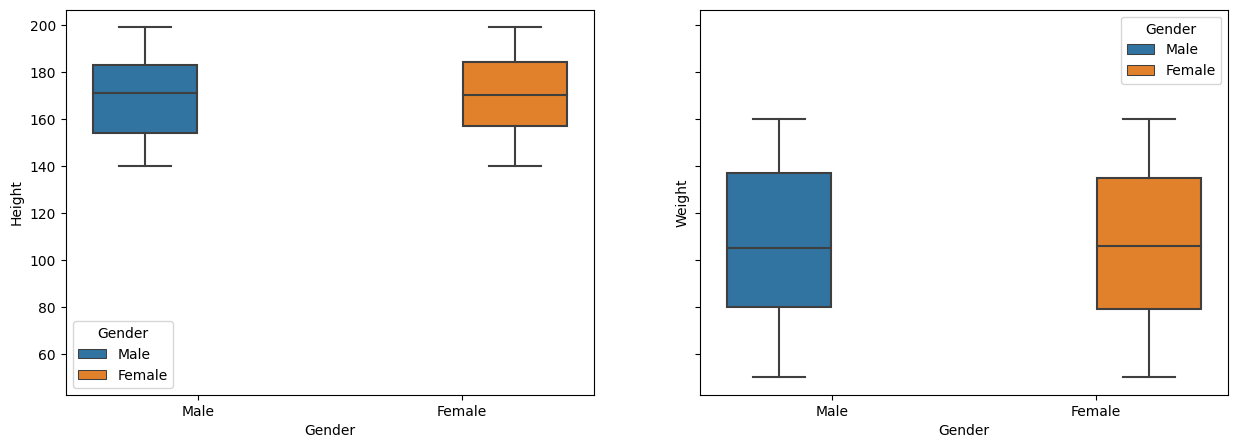

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data = df, hue="Gender", x = "Gender", y = "Height")

sns.boxplot(ax=axes[1], data = df, hue="Gender", x = "Gender", y = "Weight")

plt.show()

<Axes: xlabel='Index', ylabel='Weight'>

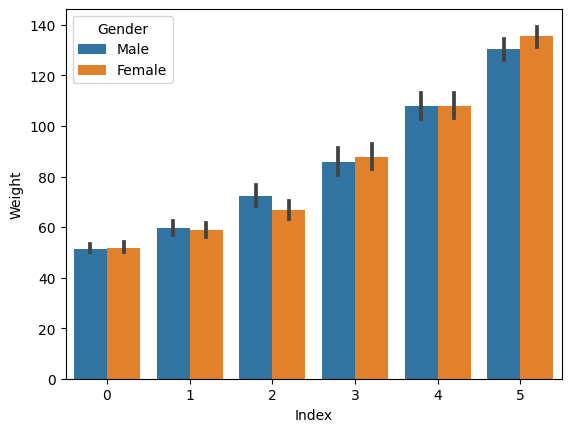

In [21]:
sns.barplot(x="Index",y="Weight",hue='Gender',data=df)

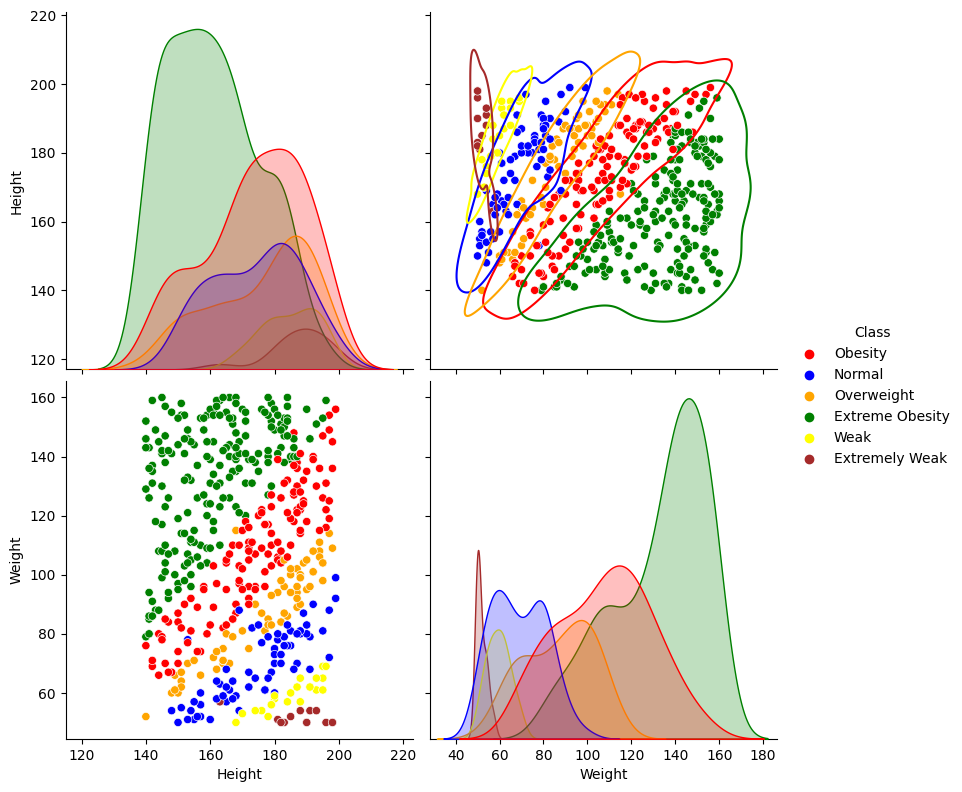

In [22]:
# Visualizing with Pairplot 

colors = ["red", "blue", "orange", "green", "yellow", "brown"]
new_df = df.drop(labels=["Index"], axis=1)

pairplot = sns.pairplot(data=new_df, hue="Class", size=4, palette=colors)
pairplot.map_upper(sns.kdeplot, levels=1, color="1")

plt.show()

### Data Preprocessing

In [23]:
df = df.drop(labels=["Class"], axis=1)
df["Gender"] = np.where(df["Gender"] == "Male", 1, 0)

df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


### Data Manipulation

In [24]:
X = df.drop(["Index"], axis=1)
Y = df["Index"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=7)

In [26]:
# Feature scaling

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

### Model Training and Prediction

In [27]:
# Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((5,3)), columns=['Accuracy', 'Precision', 'F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)',
                         'Support Vector Machine (SVM)']

In [28]:
Evaluation_Results

,Accuracy,Precision,F1-score
Logistic Regression (LR),0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0


In [42]:
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 
    
    print('{}{}{}{}\n'.format('<'*2,'-'*15,Evaluation_Results.index[i], '-'*15,'>'*2))
    
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('Precision = {}%'.format(round(precision_score(y_test, pred, average='weighted'),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100))
    
    print('Confusiton Matrix\n', confusion_matrix(y_test, pred))
    print('Classification Report\n', classification_report(y_test, pred))

I. Logistic Regression

In [43]:
LR_model = LogisticRegression()

space = {'C': loguniform(1e-5, 100)}

RCV = RandomizedSearchCV(LR_model, space, n_iter=50)

LR = RCV.fit(x_train_scale, y_train).best_estimator_

pred = LR.predict(x_test_scale)
pred_prob = LR.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob, 0)

<<---------------Logistic Regression (LR)---------------

Accuracy = 92.0%
Precision = 93.10000000000001%
F1 Score = 92.2%
Confusiton Matrix
 [[ 2  0  0  0  0  0]
 [ 2  7  0  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  0  0 12  1  0]
 [ 0  0  0  1 21  2]
 [ 0  0  0  0  1 42]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.78      0.88         9
           2       1.00      0.89      0.94         9
           3       0.86      0.92      0.89        13
           4       0.91      0.88      0.89        24
           5       0.95      0.98      0.97        43

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.87       100
weighted avg       0.93      0.92      0.92       100



II. Decision Tree

In [44]:
# Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

space = {"max_depth": [3, None], "criterion": ["entropy"]}

RCV = RandomizedSearchCV(DT_model, space, n_iter=50)

DT = RCV.fit(x_train_scale, y_train).best_estimator_

pred = DT.predict(x_test_scale)
pred_prob = DT.predict_proba(x_test_scale)

Classification_Summary(pred,pred_prob,1)

<<---------------Decision Tree Classifier (DT)---------------

Accuracy = 84.0%
Precision = 84.3%
F1 Score = 84.1%
Confusiton Matrix
 [[ 2  0  0  0  0  0]
 [ 1  7  1  0  0  0]
 [ 0  2  6  1  0  0]
 [ 0  0  2 11  0  0]
 [ 0  0  0  2 19  3]
 [ 0  0  0  0  4 39]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.78      0.78      0.78         9
           2       0.67      0.67      0.67         9
           3       0.79      0.85      0.81        13
           4       0.83      0.79      0.81        24
           5       0.93      0.91      0.92        43

    accuracy                           0.84       100
   macro avg       0.78      0.83      0.80       100
weighted avg       0.84      0.84      0.84       100



III. Random Forest

In [45]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

space = {'bootstrap': [True, False], 'max_depth': [10, 20, 50, None], 'max_features': ['auto', 'sqrt']}

RCV = RandomizedSearchCV(RF_model, space, n_iter=50, scoring='f1_weighted')

RF = RCV.fit(x_train_scale, y_train).best_estimator_

pred = RF.predict(x_test_scale)
pred_prob = RF.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob, 2)

<<---------------Random Forest Classifier (RF)---------------

Accuracy = 88.0%
Precision = 89.0%
F1 Score = 88.1%
Confusiton Matrix
 [[ 2  0  0  0  0  0]
 [ 1  7  1  0  0  0]
 [ 0  1  7  1  0  0]
 [ 0  0  0 12  1  0]
 [ 0  0  0  1 22  1]
 [ 0  0  0  0  5 38]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.88      0.78      0.82         9
           2       0.88      0.78      0.82         9
           3       0.86      0.92      0.89        13
           4       0.79      0.92      0.85        24
           5       0.97      0.88      0.93        43

    accuracy                           0.88       100
   macro avg       0.84      0.88      0.85       100
weighted avg       0.89      0.88      0.88       100



IV. Support Vector machine

In [46]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(x_train_scale, y_train)

param = {
     "C": [.01, .1, 1, 5, 10, 100],             
     "gamma": [.01, .1, 1, 5, 10, 100],
     "kernel": ["rbf"]
}

RCV = RandomizedSearchCV(SVM_model, param, n_iter=50)

SVM = RCV.fit(x_train_scale, y_train).best_estimator_

pred = SVM.predict(x_test_scale)
pred_prob = SVM.predict_proba(x_test_scale)

Classification_Summary(pred, pred_prob,3)

<<---------------Support Vector Machine (SVM)---------------

Accuracy = 91.0%
Precision = 92.0%
F1 Score = 91.10000000000001%
Confusiton Matrix
 [[ 2  0  0  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  1  7  1  0  0]
 [ 0  0  0 12  1  0]
 [ 0  0  0  0 23  1]
 [ 0  0  0  0  4 39]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.89      0.89      0.89         9
           2       1.00      0.78      0.88         9
           3       0.92      0.92      0.92        13
           4       0.82      0.96      0.88        24
           5       0.97      0.91      0.94        43

    accuracy                           0.91       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.92      0.91      0.91       100



### Comparison

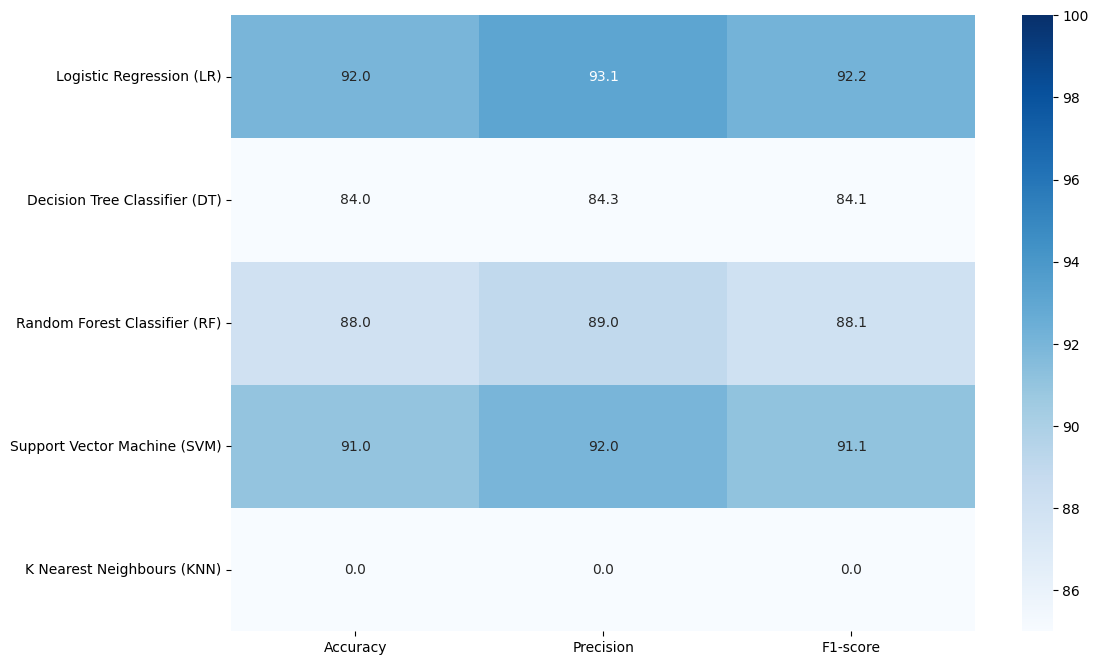

In [47]:
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='Blues', fmt='.1f')

plt.show()

### Conclusion

- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.

- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.

- Logistic Regression, Random Forest, SVM and KNN performed exceptionally well on the current dataset, considering F1-Score and Precision as the key-metric.

- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.